# M5T02
---

In [16]:
import pandas as pd

housing_data = pd.read_csv('/Users/angel/Desktop/housing data.csv', header=None)
housing_data.index=housing_data.index + 1
housing_data.columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", 
                  "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]

housing_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


Conjunto de datos que proporciona información detallada sobre diversas características socioeconómicas y ambientales de los suburbios de Boston. Cada fila representa una ciudad o área y cada columna representa una característica específica.

A continuación compruebo si hay valores faltantes o lineas duplicadas.

In [17]:
housing_data[housing_data.duplicated()]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


In [18]:
housing_data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Tenemos un conjunto de datos al que aplicamos el modelo train test en un aprendizaje supervisado teniendo como variable objetivo 'MEDV', la media del valor de los inmuebles.

In [19]:
import numpy as np
from sklearn.model_selection import train_test_split

X = housing_data.drop('MEDV', axis=1)
y = housing_data['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Una vez separado el conjunto, paso a describir las características y la variable objetivo para train y para test.

In [20]:
print("Estadísticas descriptivas para características (X_train):")
print(X_train.describe())
print("\nEstadísticas descriptivas para características (X_test):")
print(X_test.describe())

print("\nEstadísticas descriptivas para variable objetivo (y_train):")
print(y_train.describe())
print("\nEstadísticas descriptivas para variable objetivo (y_test):")
print(y_test.describe())

Estadísticas descriptivas para características (X_train):
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean     3.609125   11.569307   10.985050    0.071782    0.556484    6.315891   
std      8.875058   23.152481    6.894618    0.258447    0.117704    0.709452   
min      0.009060    0.000000    0.740000    0.000000    0.385000    3.863000   
25%      0.081437    0.000000    5.130000    0.000000    0.452000    5.890500   
50%      0.261390    0.000000    8.560000    0.000000    0.538000    6.210000   
75%      3.202962   20.000000   18.100000    0.000000    0.631000    6.636750   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean    68.556436    3.808195    9.356436  404.032

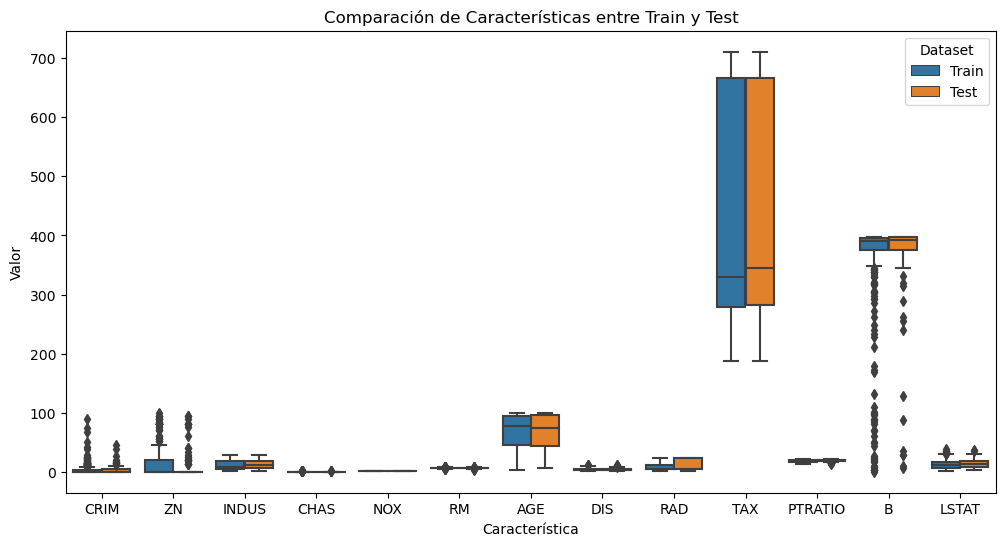

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
comparacion_caracteristicas = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", 
                  "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]

combined_data = pd.concat([X_train[comparacion_caracteristicas], X_test[comparacion_caracteristicas]], keys=['Train', 'Test'])
combined_data['Dataset'] = combined_data.index.get_level_values(0)
combined_data_melted = pd.melt(combined_data, id_vars='Dataset', value_vars=comparacion_caracteristicas)

plt.figure(figsize=(12, 6))
sns.boxplot(x='variable', y='value', hue='Dataset', data=combined_data_melted)
plt.title('Comparación de Características entre Train y Test')
plt.xlabel('Característica')
plt.ylabel('Valor')
plt.show()

En el gráfico anterior muestro la representación de cada variable comparando entre la versión en test y en train. Lo ideal sería encontrar mucha similitud entre ambas versiones para así asegurar que el modelo se va a testear en un conjunto representativo del que se ha usado para entrenarlo. En general vemos mucha similitud aunque hay excepciones como ZN y RAD. ZN hace referencia a la proporción de zonas edificables mayores a 25.000 pies disponibles para cada entrada. Hay una gran cantidad de 0 que indica que no hay zonas disponibles y supongo que es por este motivo que se ha producido la diferencia. 

Por otro lado, y aunque similares entre train y test, la columna B tiene muchos outliers. Es la variable que indica la proporción de gente de raza negra en las diferentes ciudades o barrios. Podría significar que hay muchas zonas con poca representación de gente de raza negra.

In [22]:
housing_data['B'].describe()

count    506.000000
mean     356.674032
std       91.294864
min        0.320000
25%      375.377500
50%      391.440000
75%      396.225000
max      396.900000
Name: B, dtype: float64

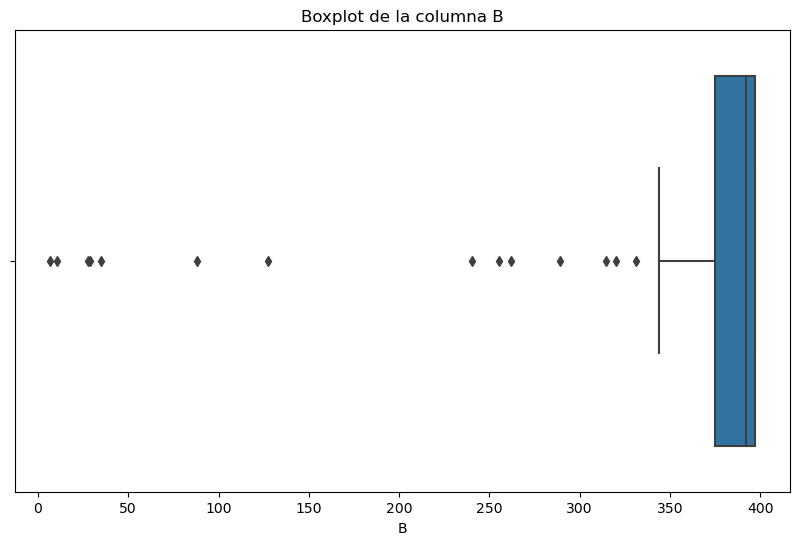

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=X_test['B'])
plt.title('Boxplot de la columna B')
plt.show()

La variable B parece mostrar que en muchas zonas de Boston hay muy poca gente de raza negra, mientras que hay mucha en muy pocas zonas.  

### Estandarización

Por la presencia de outliers uso robustS

In [24]:
from sklearn.preprocessing import RobustScaler

columna_categorica = ['CHAS', 'RAD']

X_train_to_scale = X_train.drop(columns=columna_categorica)
X_test_to_scale = X_test.drop(columns=columna_categorica)

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_to_scale)
X_test_scaled = scaler.transform(X_test_to_scale)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_to_scale.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test_to_scale.columns)

### Expansión Polinómica

In [25]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

### Columnas Dummy

In [26]:
chas_dummies = pd.get_dummies(housing_data['CHAS'], prefix='CHAS', drop_first=True)
rad_dummies = pd.get_dummies(housing_data['RAD'], prefix='RAD', drop_first=True)
housing_data = pd.concat([housing_data, chas_dummies, rad_dummies], axis=1)
housing_data = housing_data.drop(['CHAS', 'RAD'], axis=1)

housing_data

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,...,MEDV,CHAS_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
1,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,...,24.0,0,0,0,0,0,0,0,0,0
2,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,...,21.6,0,1,0,0,0,0,0,0,0
3,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,...,34.7,0,1,0,0,0,0,0,0,0
4,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,...,33.4,0,0,1,0,0,0,0,0,0
5,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,...,36.2,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,273.0,21.0,391.99,...,22.4,0,0,0,0,0,0,0,0,0
503,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,273.0,21.0,396.90,...,20.6,0,0,0,0,0,0,0,0,0
504,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,273.0,21.0,396.90,...,23.9,0,0,0,0,0,0,0,0,0
505,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,273.0,21.0,393.45,...,22.0,0,0,0,0,0,0,0,0,0


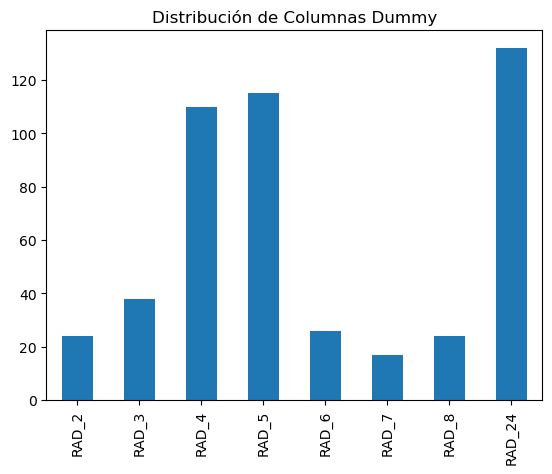

In [32]:
columnas_dummies=['RAD_2', 'RAD_3', 'RAD_4', 'RAD_5', 'RAD_6', 'RAD_7', 'RAD_8', 'RAD_24']
columnas_dummy_data = housing_data[columnas_dummies]

suma_columnas_dummy = columnas_dummy_data.sum()
suma_columnas_dummy.plot(kind='bar', title='Distribución de Columnas Dummy')

plt.show()

La variable RAD representan los accesos de la autopista a las zonas en concreto. La más usada es RAD_24, seguida de RAD_4 y RAD_5. 